In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bookings_data = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\bookings_data.csv')
bookings_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015


In [3]:
## Exploring the dataset for finsing the inconsistencies
bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
## Step 1 Filling the misisng values in country column
bookings_data['country']= np.where(pd.isna(bookings_data['country']),'No Country', bookings_data['country'])
bookings_data['country'].unique()

## Step 2 Filling the missing values in the columns 'Agent' and 'Company' because only a portion of deals come through agents
bookings_data['agent']= np.where(pd.isna(bookings_data['agent']),'No Agent', bookings_data['agent'])
bookings_data['company'] = np.where(pd.isna(bookings_data['company']), 'No Company',bookings_data['agent'])

bookings_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,No Company,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,No Company,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,No Agent,No Company,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,No Company,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,No Company,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,No Company,0,Transient,105.5,0,0,Canceled,22/4/2015


In [5]:
## Step 3: Creating a combined arrival date for each customers using the year, month and day columns given
bookings_data['arrival_date'] = pd.to_datetime(bookings_data['arrival_date_year'].astype(str) + '-' + bookings_data['arrival_date_month'].astype(str) + '-' + bookings_data['arrival_date_day_of_month'].astype(str),
                                               format='%Y-%B-%d')

## After this there is no requirement of the columns showing month, year and day so we can drop them
bookings_data.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],inplace=True)

In [6]:
## Step 4: Changing the data type of the column reservation_status_date to date 
bookings_data['reservation_status_date'] = pd.to_datetime(bookings_data['reservation_status_date'],format='%d/%m/%Y',errors='coerce')
bookings_data['reservation_status_date'] = bookings_data['reservation_status_date'].dt.strftime('%Y-%m-%d')
bookings_data['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [7]:
bookings_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,No Company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


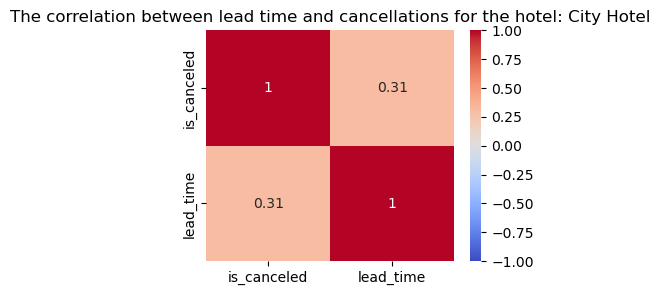

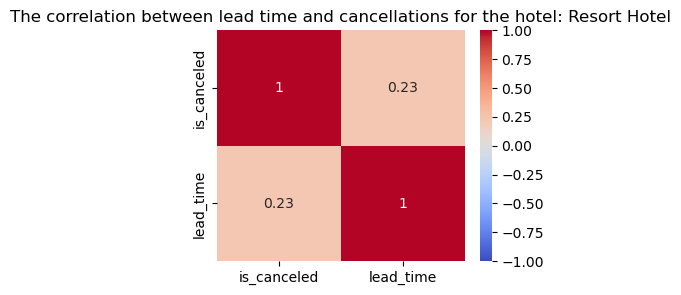

In [8]:
## Question 1:  How does the cancellation affect with lead-time in days for both the hotels? 
## Explanation: It is possible that people tend to cancel their trips more often if they have a long time gap between the booking date and arrival date
## because of various personal and professional reasons. If we are able to find out the average time that should be allowed between a customer's booking and arrival,
## the cancellations can be prevented

required_columns= ['is_canceled', 'lead_time']
for hotel_name,group in bookings_data.groupby('hotel'):  
## this is used to group the entire data based on the hotel name. It then iterates over the hotel name and the group formed for that hotel.                                                           
    selected = group[required_columns] ## This picks only the desired columns for which we want to build the correlation matrix
    corr_graph= selected.corr()
    plt.figure(figsize=(4,3))
    sns.heatmap(corr_graph,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
    plt.title(f"The correlation between lead time and cancellations for the hotel: {hotel_name}")

In [56]:
## Observation Concluded
## There is a considerable correlation between the cancellation frequency for both the hotels. This shows that people tend to cancel their bookings if 
## there is a long gap between their actual arrival and the booking of the hotel rooms. Hence, we will use IQR to find the median of the data and choose the least number
## to help us fix the issue in pandas.

percentile_25 = bookings_data['lead_time'].quantile(0.25)
percentile_75= bookings_data['lead_time'].quantile(0.75)
IQR = (bookings_data['lead_time'].quantile(0.75) - bookings_data['lead_time'].quantile(0.25))
print(f'The maximum time limit that should be given to the users for booking the hotel in prior is approximately: {np.floor(IQR/30)} days')

The maximum time limit that should be given to the users for booking the hotel in prior is approximately: 4.0 days


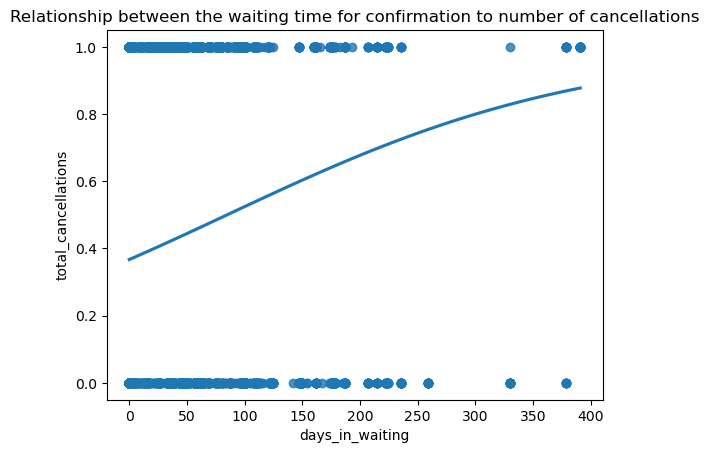

count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

In [10]:
## Question 2:  How does the cancellation affect with days in waiting in days for both the hotels? 
## Explanation: It is possible that people tend to cancel their trips more often if it takes longer time to confirm their bookings. Hence we need to investigate it 

sns.regplot(data=bookings_data,x='days_in_waiting_list', y='is_canceled',logistic=True,ci=None)
plt.title("Relationship between the waiting time for confirmation to number of cancellations")
plt.xlabel('days_in_waiting')
plt.ylabel('total_cancellations')
plt.show()

## Observations Concluded:
## The left side of the graph is comparitively lower. This shows that most of the bookings are not cancelled when the confirmation time is less.
## Whereas on the right ide, the graph is moving in the upward direction showcasing that more bookings are cancleled when the customer has to wait longer
## for confirmation of the hotel. 

bookings_data['days_in_waiting_list'].describe()
## Clearly here we can see that it takes on an average 2 days for confirming the booking which is not efficient from the perspective of customer service.
## The confirmation time has to be reduced for avoiding the frequency of cancellations.

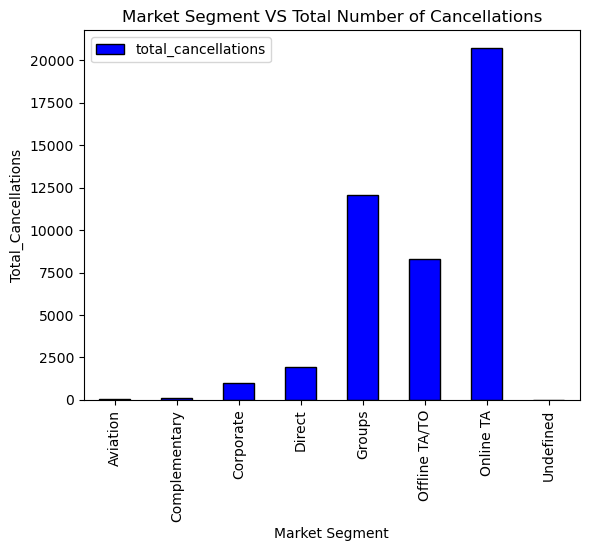

In [11]:
## Question 3: What is the breakdown of total number of cancellations per market segment?
bookings_data.head(5)
market_segment_data= bookings_data.groupby('market_segment').agg(total_cancellations=('is_canceled','sum')).plot(kind='bar',color='blue',edgecolor='black')
plt.title("Market Segment VS Total Number of Cancellations")
plt.xlabel('Market Segment')
plt.ylabel('Total_Cancellations')
plt.show()

## Observations Concluded
## The "Online TA" (Online Travel Agents) segment shows the highest number of cancellations, with over 20,000.
## This suggests that bookings made through online travel agencies are most prone to cancellations.

## Moving further, the "Groups" segment has the second highest cancellations, slightly above 12,000 which indicates that
## group bookings are tougher to execute and they face more uncertainty (e.g., coordination issues, bulk travel changes)
## But this is certainly not in control because we cannot determine beforehand the size of the group travelling

## Lastly, "Offline TA/TO" (Travel Agents/Tour Operators) and "Direct" bookings also have a significant number of cancellations.
## This also indicates that even bookings made directly or through traditional agents are not immune to cancellations.

## Recommendations:
## Since Online TA has the highest cancellations, the authorities should consider reviewing cancellation policies or improving user engagement for this segment.

## To avoid massive cancellatiosn for group bookings, startegies can be imposed to introduce flexible cancellation or deposit policies to reduce risk from large group cancellations.

## Corporate and Complementary segments appear more reliable. Some good booking offers can be provided to them for more stable revenue streams.


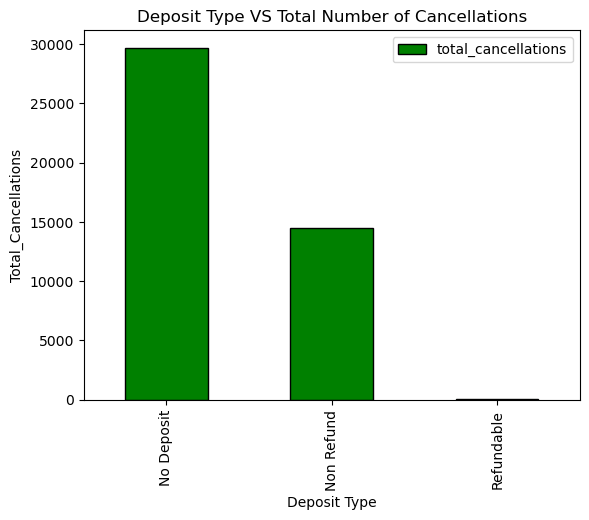

In [12]:
## Question 4: What is the breakdown of total number of cancellations as per the deposit type?

deposit_type_data= bookings_data.groupby('deposit_type').agg(total_cancellations=('is_canceled','sum')).plot(kind='bar',color='green',edgecolor='black')
plt.title("Deposit Type VS Total Number of Cancellations")
plt.xlabel('Deposit Type')
plt.ylabel('Total_Cancellations')
plt.show()

## Observations Concluded:
## Here we can see that majority of the cancellations whave happened because the customers didnt deposit any money in advance.
## This has given them the facility to book as per their feasibility and pay later, usually at the time of check-in or usage

## Recoomendations:
## If most cancellations are coming from "no deposit" bookings, it could menas that the customers don’t feel committed.
## As there is no financial loss if they cancel, it makes it easy for them to cancel last-minute.
## This cancellation freedom should be reduced by taking some advance from the customer (40-50%) so they don't tend to cancel with utmost ease.

The overall repeat_customer_percentage is 3.191%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10176\3970709768.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customer_data['year_month'] = repeat_customer_data['arrival_date'].dt.to_period('M').dt.to_timestamp()


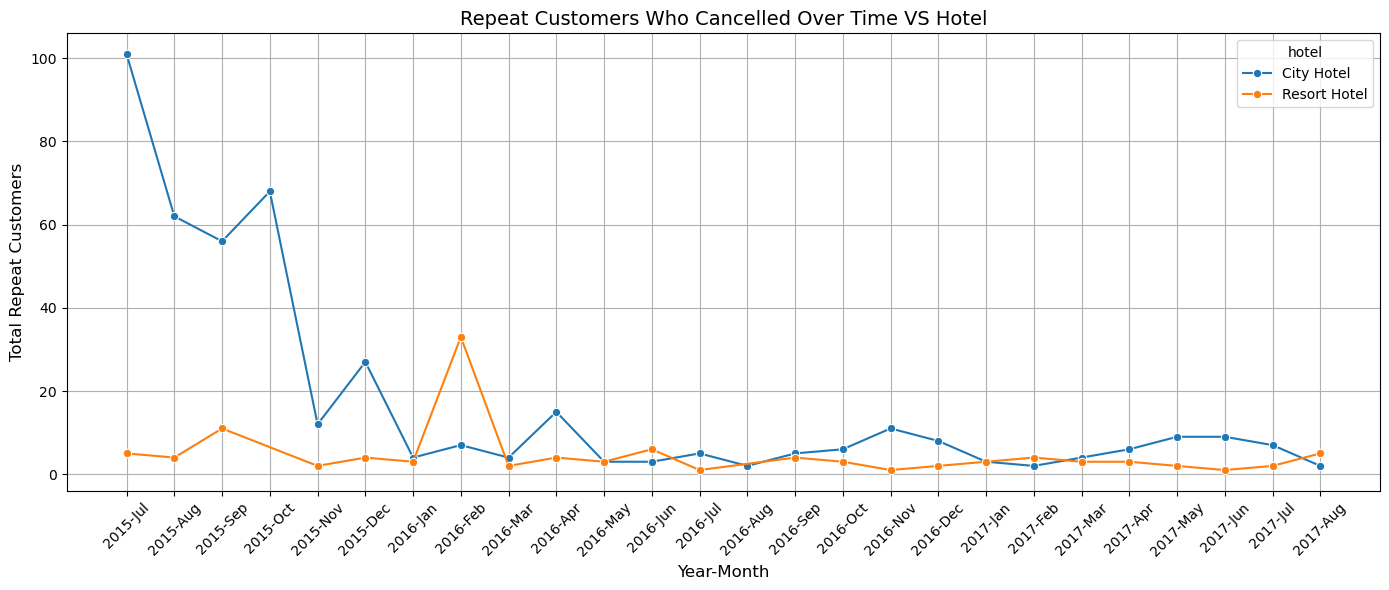

In [13]:
## Question 5: What is the trend in the number of customer who were repeat customers but ended up cancelling their visit.
repeat_customer_count= bookings_data['is_repeated_guest'].sum()
total_customers= bookings_data.shape[0]
repeat_customer_percentage = np.round((repeat_customer_count*100.0)/total_customers,3)
print(f'The overall repeat_customer_percentage is {repeat_customer_percentage}%')

repeat_customer_data = bookings_data[(bookings_data['is_repeated_guest']==1) & (bookings_data['is_canceled']==1)]
repeat_customer_data['year_month'] = repeat_customer_data['arrival_date'].dt.to_period('M').dt.to_timestamp()
refined_data = repeat_customer_data.groupby(['hotel','year_month']).agg(total_repeat_customers= ('is_repeated_guest','sum')).sort_values(by='year_month',ascending=True).reset_index()

refined_data['year_month'] = refined_data['year_month'].dt.strftime('%Y-%b')

plt.figure(figsize=(14, 6))
sns.lineplot(data=refined_data, x='year_month', y='total_repeat_customers', hue='hotel', marker='o')

# Formatting
plt.title('Repeat Customers Who Cancelled Over Time VS Hotel', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Repeat Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

## Observations Concluded
## Key Observations:
## 1) City Hotel had a significantly higher number of repeat customer cancellations in mid-2015, peaking in July 2015 with over 100 cancellations.
## 2) Post-2015, cancellations at City Hotel dropped sharply and gradually declined, with occasional small spikes.
## 3) Resort Hotel maintained relatively low and stable cancellation numbers from repeat customers across the entire period, with a small peak in February 2016.
## 4) City Hotel appears to have faced serious issues in retaining repeat customers in 2015, which may reflect dissatisfaction with service
## 5) Resort Hotel, on the other hand, demonstrated consistently low cancellation rates among repeat customers, indicating stronger customer retention.

In [14]:
## Question 6: Investigate how assigning incorrect or undesired room types to customers impacted the cancellation rates.
required_data = bookings_data[['hotel', 'is_canceled','reserved_room_type','assigned_room_type']]
required_data['score'] = np.where(bookings_data['reserved_room_type']!= bookings_data['assigned_room_type'], 1, 0)
cancellation_percentage = round(required_data['score'].sum()*100/required_data.shape[0],2)
print(f"The overall cancellation percentage because of improper allocation of reserved rooms is {cancellation_percentage}%")

## Observation concluded: 
## When cutomers are not assigned he room they've booked as per their requirements, the frequency of cancellations happening is quite dominant.

The overall cancellation percentage because of improper allocation of reserved rooms is 12.49%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10176\3097364204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data['score'] = np.where(bookings_data['reserved_room_type']!= bookings_data['assigned_room_type'], 1, 0)


In [15]:
## Question 7: What is the correlation between the number of cancelations happening and the number of adults accompanying 
adults_cancellations= bookings_data.groupby('adults').agg(total_cancellations=('is_canceled','sum')).sort_values(by='total_cancellations',ascending=False).reset_index().head(5)
adults_cancellations

## Observations Concluded: From here we can infer that if there are 3 or more than 3 adults accompanying in a single bookings, it is liekely to get cancelled because it might get 
## uncomfortable for them to adjust 

## Recommendations
## It would be advisable that the total number of adults accompanying in a single booking should be restricted to 2.

,adults,total_cancellations
0,2,35258
1,1,6674
2,3,2151
3,0,109
4,4,16


In [16]:
## Question 8: What is the breakdown of the number of cancelations happening and distribution channels 

bookings_data.groupby('distribution_channel').agg(total_cancellations = ('is_canceled','sum')).sort_values(by='total_cancellations', ascending=False).reset_index()

## Observations concluded
## Undefined channel has the lowest cancellations with just 4.
## Bookings through intermediaries (TA/TO) are most prone to cancellations.
## Direct and corporate channels show better booking commitment.
## GDS is a stable, low-risk channel with minimal cancellations.
## Undefined entries may indicate data quality issues.

## Recommendations
## Shifting focus to direct and corporate channels could reduce overall cancellation rates.

,distribution_channel,total_cancellations
0,TA/TO,40152
1,Direct,2557
2,Corporate,1474
3,GDS,37
4,Undefined,4


In [17]:
## Question 9: What is the breakdown of the number of cancelations happening and agents

bookings_data.groupby('agent').agg(total_cancellations = ('is_canceled','sum')).sort_values(by='total_cancellations', ascending=False).reset_index().head(10)

## Observations Concluded:
## Agent 9.0 has the highest cancellations with 13,264 bookings canceled.
## Agent 240.0 follows with 5,484 cancellations.
## Agent 1.0 has a close number with 5,280 cancellations.
## Bookings without any agent involvement ("No Agent") still account for 4,030 cancellations.

## Recommendations
## 1) High cancellations by specific agents might indicate a need to review their booking practices or client profiles. The hotels also need to revise their cancellation terms with the agents.
## 2) The hotel authorities can advise the agents to collect some advance deposit from the clients and give the hotel a commission too as a security deposit.
## 3) This way, it will also push the customers to stay affirmed to their bookings and not cancel them because they haven’t paid any deposit upfront.

,agent,total_cancellations
0,9.0,13264
1,240.0,5484
2,1.0,5280
3,No Agent,4030
4,6.0,1025
5,19.0,780
6,3.0,771
7,37.0,717
8,14.0,652
9,29.0,546


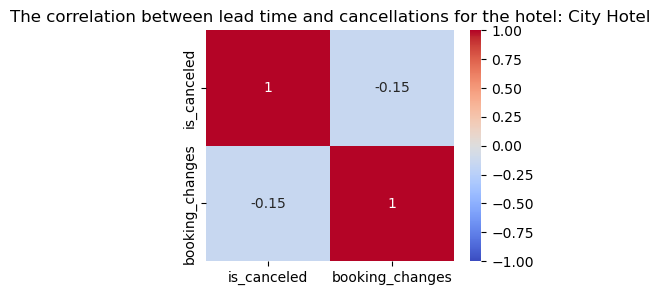

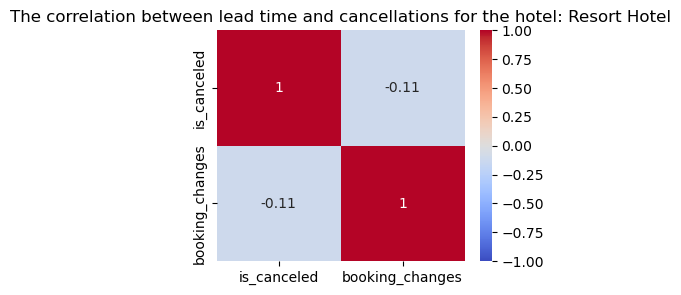

In [18]:
## Question 9 What is the correlation between the total numer of cancellations vs the frequency of changes made by the customers in their bookings

required_columns_1= ['is_canceled', 'booking_changes']
for hotel_name,group in bookings_data.groupby('hotel'):  
## this is used to group the entire data based on the hotel name. It then iterates over the hotel name and the group formed for that hotel.                                                           
    selected = group[required_columns_1] ## This picks only the desired columns for which we want to build the correlation matrix
    corr_graph= selected.corr()
    plt.figure(figsize=(4,3))
    sns.heatmap(corr_graph,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
    plt.title(f"The correlation between lead time and cancellations for the hotel: {hotel_name}")

## Observations Concluded
## Correlation between is_canceled and booking_changes = -0.15 and -0.11: This indicates a weak negative correlation between cancellations and booking changes. 
## It suggests that bookings with more changes are slightly less likely to be canceled, though the relationship is not strong.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10176\1054851399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_data['Year-Month'] = canceled_data['reservation_status_date'].dt.to_period('M').dt.strftime('%Y-%b')


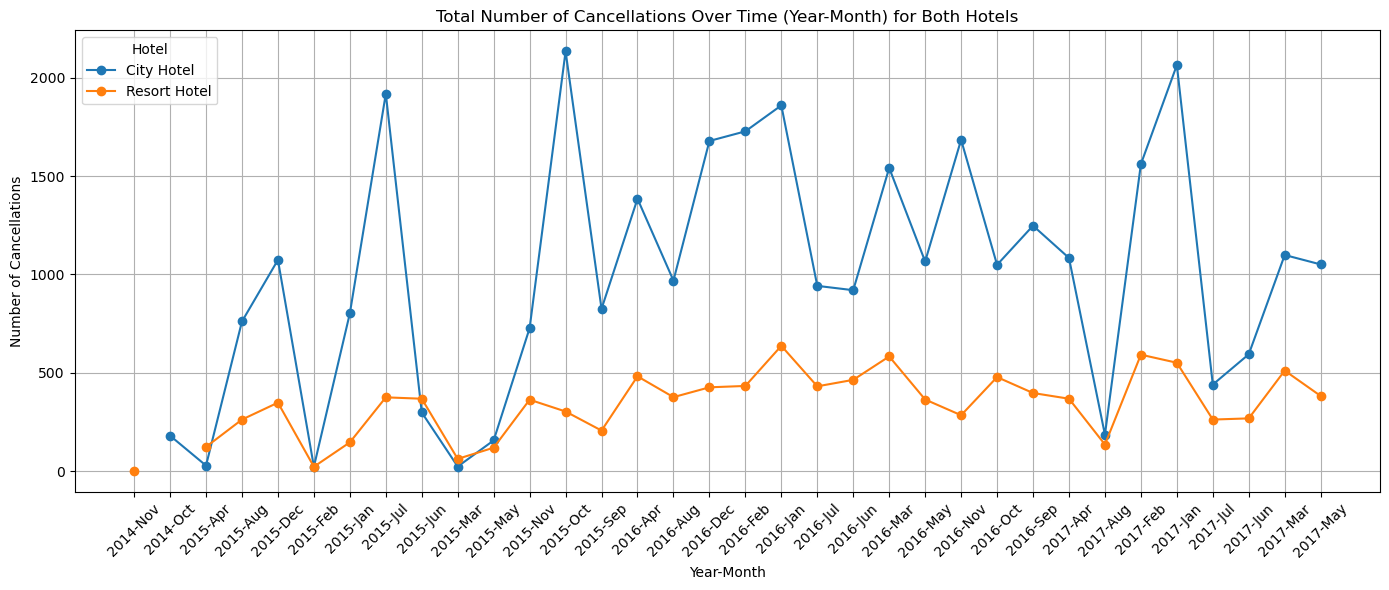

In [19]:
## Question 10) What is the frequency of cancellations for both the hotel sduring different months
bookings_data['reservation_status_date'] = pd.to_datetime(bookings_data['reservation_status_date'], errors='coerce', format='%Y-%m-%d')

# Filter canceled bookings
canceled_data = bookings_data[bookings_data['is_canceled'] == 1]

# Extract Year-Month from the 'reservation_status_date'
canceled_data['Year-Month'] = canceled_data['reservation_status_date'].dt.to_period('M').dt.strftime('%Y-%b')

# Group by both 'Year-Month' and hotel identifier (assuming it's 'hotel')
cancellation_trend = canceled_data.groupby(['Year-Month', 'hotel']).size().unstack()

# Plot the line chart
plt.figure(figsize=(14, 6))

# Plot the trends for each hotel
for hotel in cancellation_trend.columns:
    plt.plot(cancellation_trend.index.astype(str), cancellation_trend[hotel], marker='o', label=hotel)

# Title and labels
plt.title('Total Number of Cancellations Over Time (Year-Month) for Both Hotels')
plt.xlabel('Year-Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Hotel', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Observations Concluded 


## It can be seen that throughout the time period shown, the City Hotel  consistently experiences a higher number of cancellations compared to the Resort Hotel. 
## In several months, cancellations for City Hotels spike well above 1,500, even crossing 2,000 at peak times. 
## This indicates a recurring pattern of large-scale booking reversals in City Hotels.

## The City Hotel cancellation trend is marked by peaked rises and falls. 
## This volatility points to potential issues such as last-minute cancellation rates, or external factors like events that lead to sudden booking surges followed by mass cancellations. These sharp movements are especially evident in mid-2015, mid-2016, and early 2017.

## Cancellation trends appear cyclical: 
## The data suggests a cyclical or seasonal pattern in cancellation behavior, particularly for the City Hotel. 
## The spikes tend to recur around similar times each year, indicating that cancellations may be influenced by yearly events, holidays, or business travel cycles.


In [20]:
## Our exploratory data analysis is completed in Python. The remianing analysis will be done in SQL by pushing the data in sql

In [21]:
import pyodbc
import sqlalchemy
from sqlalchemy import create_engine
server = r'DESKTOP-A6INTKA\SQLEXPRESS'
database = 'hotel_cancellation_project'
connection_string = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# Create the engine
engine = create_engine(connection_string)

bookings_data.to_sql("bookings_data",con=engine, if_exists="replace",chunksize=10000)

197